In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
from sklearn.metrics import classification_report, cohen_kappa_score, accuracy_score, recall_score, f1_score, precision_score


In [5]:
#changing the width for a more natural view

pd.set_option('display.width', 900)

In [6]:
red_wine = pd.read_csv("/Users/CAB Projects/1_My Projects/4_BlueBerry Winery/Data Set/winequality-red.csv", sep=";")

In [7]:
#Epic 3 - Data Wrangling

print("\nThe first 10 records in the red wine data set\n", red_wine.head(10))

print("\nThe last 10 records in the red wine data set\n", red_wine.tail(10))


The first 10 records in the red wine data set
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality
0            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5
1            7.8              0.88         0.00             2.6      0.098                 25.0                  67.0   0.9968  3.20       0.68      9.8        5
2            7.8              0.76         0.04             2.3      0.092                 15.0                  54.0   0.9970  3.26       0.65      9.8        5
3           11.2              0.28         0.56             1.9      0.075                 17.0                  60.0   0.9980  3.16       0.58      9.8        6
4            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.5

In [8]:
#Epic 3 - Data Wrangling

print("\nThe basic information about the red wine data set using info")
red_wine.info()


The basic information about the red wine data set using info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
#Epic 3 - Data Wrangling

print("\nThe basic information about the red wine data set using shape method")
red_wine.shape


The basic information about the red wine data set using shape method


(1599, 12)

In [10]:
#Epic 3 - Data Wrangling

#Checking for missing values

red_wine.isnull().count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [11]:
#Epic 3 - Data Wrangling

#Checking for missing values

red_wine.notna().count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [12]:
# following common data science pratice and changing the coloumn nacmes

red_wine.columns = red_wine.columns.str.replace(' ', '_')
red_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], dtype='object')

In [13]:
#Epic 3 - Data Wrangling

# We are creating a new column called "quality_label", we define a range and associate that range with a label

red_wine["quality_label"] = red_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')

In [14]:
# here we are transforming these labels into categorical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories = ['low', 'medium', 'high'])

In [15]:
red_wine["wine_type"]= "red"

red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         1599 non-null   float64 
 1   volatile_acidity      1599 non-null   float64 
 2   citric_acid           1599 non-null   float64 
 3   residual_sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free_sulfur_dioxide   1599 non-null   float64 
 6   total_sulfur_dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   int64   
 12  quality_label         1599 non-null   category
 13  wine_type             1599 non-null   object  
dtypes: category(1), float64(11), int64(1), object(1)
memory 

In [16]:
white_wine = pd.read_csv("/Users/CAB Projects/1_My Projects/4_BlueBerry Winery/Data Set/winequality-white.csv", sep=";")

In [17]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [18]:
# following common data science pratice and changing the coloumn nacmes

white_wine.columns = white_wine.columns.str.replace(' ', '_')
white_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], dtype='object')

In [19]:
# checking the white wine data set

white_wine.shape


(4898, 12)

In [20]:
# checking the white wine data set

white_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [21]:
# checking the white wine data set

white_wine.isnull().count()

fixed_acidity           4898
volatile_acidity        4898
citric_acid             4898
residual_sugar          4898
chlorides               4898
free_sulfur_dioxide     4898
total_sulfur_dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

In [22]:
#Epic 3 - Data Wrangling

print("The first 10 records in the white wine data set")
white_wine.head(10)

The first 10 records in the white wine data set


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [23]:
#Epic 3 - Data Wrangling

print("The last 10 records in the white wine data set")
white_wine.tail(10)

The last 10 records in the white wine data set


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4888,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5
4889,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6
4890,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6
4891,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
4892,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5
4893,6.2,0.210,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.240,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.290,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.210,0.38,0.80,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [24]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label

white_wine["quality_label"] = white_wine["quality"].apply(lambda value: "low" if value <= 5 else "medium" if value <= 7 else "high")


# here we are transforming these labels into categorical data type (specific to pandas) instead of simple string
white_wine["quality_label"] = pd.Categorical(white_wine["quality_label"], 
categories = ["low", "medium", "high"])

# labelling white wine dataset with its wine type
white_wine["wine_type"] = "white"

print("\n", white_wine.head(10))
print("\n", white_wine.tail(10))


    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality quality_label wine_type
0            7.0              0.27         0.36            20.7      0.045                 45.0                 170.0   1.0010  3.00       0.45      8.8        6        medium     white
1            6.3              0.30         0.34             1.6      0.049                 14.0                 132.0   0.9940  3.30       0.49      9.5        6        medium     white
2            8.1              0.28         0.40             6.9      0.050                 30.0                  97.0   0.9951  3.26       0.44     10.1        6        medium     white
3            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0.40      9.9        6        medium     white
4            7.2              0.23         0.32             8.5     

In [25]:
# Then combining the two datasets into one: wines.

wines = pd.concat([red_wine, white_wine])
wines.info()
wines.head(10), wines.tail(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         6497 non-null   float64 
 1   volatile_acidity      6497 non-null   float64 
 2   citric_acid           6497 non-null   float64 
 3   residual_sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free_sulfur_dioxide   6497 non-null   float64 
 6   total_sulfur_dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  quality_label         6497 non-null   category
 13  wine_type             6497 non-null   object  
dtypes: category(1), float64(11), int64(1), object(1)
memory 

(   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality quality_label wine_type
 0            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5           low       red
 1            7.8              0.88         0.00             2.6      0.098                 25.0                  67.0   0.9968  3.20       0.68      9.8        5           low       red
 2            7.8              0.76         0.04             2.3      0.092                 15.0                  54.0   0.9970  3.26       0.65      9.8        5           low       red
 3           11.2              0.28         0.56             1.9      0.075                 17.0                  60.0   0.9980  3.16       0.58      9.8        6        medium       red
 4            7.4              0.70         0.00             1.9 

In [26]:
# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)
wines.head(10), wines.tail(10)

(   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality quality_label wine_type
 0            7.0              0.17         0.74            12.8      0.045                 24.0                 126.0  0.99420  3.26       0.38     12.2        8          high     white
 1            7.7              0.64         0.21             2.2      0.077                 32.0                 133.0  0.99560  3.27       0.45      9.9        5           low       red
 2            6.8              0.39         0.34             7.4      0.020                 38.0                 133.0  0.99212  3.18       0.44     12.0        7        medium     white
 3            6.3              0.28         0.47            11.2      0.040                 61.0                 183.0  0.99592  3.12       0.51      9.5        6        medium     white
 4            7.4              0.35         0.20            13.9 

In [27]:
# Epic 3: Exploratory Analysis -  Creating a table to compare some features of the two different wines next to each other

pd.concat([red_wine[["residual_sugar", "total_sulfur_dioxide", "sulphates", "alcohol", "volatile_acidity", "quality"]].describe(), 
white_wine[["residual_sugar", "total_sulfur_dioxide", "sulphates", "alcohol", "volatile_acidity", "quality"]].describe()], keys= ["red wine statistics", "white wine statistics"], axis=1)

red wine statistics                                                                              white wine statistics                                                                             
           residual_sugar total_sulfur_dioxide    sulphates      alcohol volatile_acidity      quality        residual_sugar total_sulfur_dioxide    sulphates      alcohol volatile_acidity      quality
count         1599.000000          1599.000000  1599.000000  1599.000000      1599.000000  1599.000000           4898.000000          4898.000000  4898.000000  4898.000000      4898.000000  4898.000000
mean             2.538806            46.467792     0.658149    10.422983         0.527821     5.636023              6.391415           138.360657     0.489847    10.514267         0.278241     5.877909
std              1.409928            32.895324     0.169507     1.065668         0.179060     0.807569              5.072058            42.498065     0.114126     1.230621         0.100795     0.885639
min              0.900000             6.000000     0.330000     8.400000         0.120000     3.000000              0.600000             9.000000     0.220000     8.000000         0.080000     3.000000
25%              1.900000            22.000000     0.550000     9.500000         0.390000     5.000000              1.700000           108.000000     0.410000     9.500000         0.210000     5.000000
50%              2.200000            38.000000     0.620000    10.200000         0.520000     6.000000              5.200000           134.000000     0.470000    10.400000         0.260000     6.000000
75%              2.600000            62.000000     0.730000    11.100000         0.640000     6.000000              9.900000           167.000000     0.550000    11.400000         0.320000     6.000000
max             15.500000           289.000000     2.000000    14.900000         1.580000     8.000000             65.800000           440.000000     1.080000    14.200000         1.100000     9.000000

In [28]:
# Observations on the dataset
# We have an imbalanced data set - more red wines vs white wines
# white wine has more residual sugar than red wine on average
# We have more data on white wine compared to red
# Sulfur dioxide is much higher in white compared to red wines. There is a high std. what does that mean?
# Volatile acidity is lower in white wine on average
# The alcohol content is the same on average
# On average, sulfates and volatile acidity seem to be higher in red wine as compared to white wine.
# high qualitiy white wines have low sugar levels and total SO2 --> high quality between sugar levels and quality
# the company produces more quality white wines as compared to reds (3,7%, and 62%)


In [29]:
# Here we are practicing slicing

white_wine.iloc[:,[0,2]]

,fixed_acidity,citric_acid
0,7.0,0.36
1,6.3,0.34
2,8.1,0.40
3,7.2,0.32
4,7.2,0.32
...,...,...
4893,6.2,0.29
4894,6.6,0.36
4895,6.5,0.19
4896,5.5,0.30


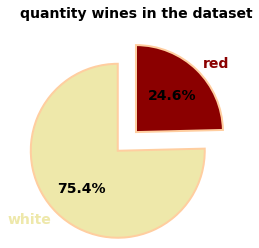

In [30]:
# 1st plot - showing the quantity of red wines compared to the quantity of white wines

# first, get the count of red and white wines from the dataframe, using labels from dataframe

colors1 = ["PaleGoldenRod", "darkred"]

patches, texts, pcts = plt.pie(
        wines["wine_type"].value_counts(), #data
        autopct='%1.1f%%', 
        labels= wines["wine_type"].unique(),
        startangle= 90, 
        colors= colors1,
        wedgeprops= {"linewidth": 2, "edgecolor": "#FFCEA0"},
        textprops= {"size": 14, "fontweight":'bold'},
        explode= (0.3, 0)
        )

#playing aroung with the styling
# For each wedge, set the corresponding text label color to the wedge's face color

for i, patch in enumerate (patches):
        texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color = "black")
plt.title("quantity wines in the dataset", {"size": 14, "fontweight":'bold', "color": "black"})
plt.show()


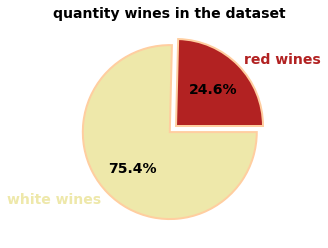

In [31]:
# 1st plot - showing the quantity of red wines compared to the quantity of white wines
# Now we use the subplot function

# first, get the count of red and white wines
quantity_of_wines = wines.groupby(["wine_type"])["wine_type"].count()

# number two - give them labels
labels1 = "red wines", "white wines"
colors2 = ["FireBrick", "PaleGoldenRod"]

# number three - plot and style
fig, ax = plt.subplots()
patches, texts, pcts = ax.pie(quantity_of_wines, 
                                labels= labels1,
                                autopct='%1.1f%%',
                                colors= colors2,
                                wedgeprops= {"linewidth": 2, "edgecolor": "#FFCEA0"},
                                textprops= {"size": 14, "fontweight":"bold"},
                                explode= (0.1, 0)
                             )


for i, patch in enumerate (patches):
        texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color = "black")
plt.title("quantity wines in the dataset", {"size": 14, "fontweight":'bold', "color": "black"})
plt.show()


In [32]:

# Plot to show the distribution of qualities among red and white wines

# creating two data frames

Quality_Whites = pd.DataFrame(white_wine[["quality_label"]].value_counts().rename_axis("quality_label").reset_index(name="counts").sort_values(by=["quality_label"]))
print("The distribution of qualities among the whites are \n",Quality_Whites)

print("\n")

Quality_Reds = red_wine[["quality_label"]].value_counts().rename_axis("quality_label").reset_index(name="counts").sort_values(by=["quality_label"])
print("The distribution of qualities among the reds are \n", Quality_Reds)

The distribution of qualities among the whites are 
   quality_label  counts
1           low    1640
0        medium    3078
2          high     180


The distribution of qualities among the reds are 
   quality_label  counts
1           low     744
0        medium     837
2          high      18


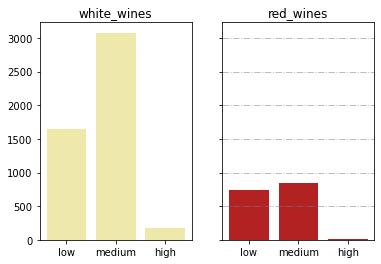

In [33]:
# Now we plot with information from the above cell

fig1,(ax1, ax2) = plt.subplots(1,2, sharey=True)

ax1.bar(Quality_Whites["quality_label"], Quality_Whites["counts"], color= "PaleGoldenRod")
ax2.bar(Quality_Reds["quality_label"], Quality_Reds["counts"],color= "FireBrick")

ax1.set_title("white_wines")
ax2.set_title("red_wines")

plt.grid(color='slategrey', linestyle='-.', linewidth=1, axis='y', alpha=0.5)
plt.show()

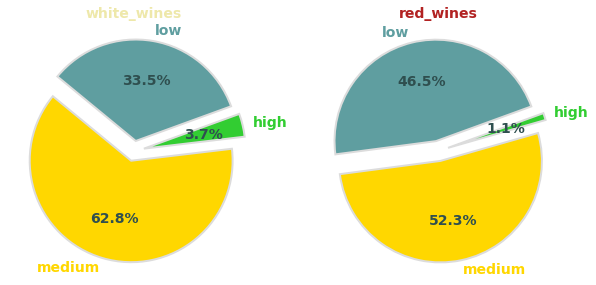

In [34]:
# Distribution of qualities as a pie chart - more useful

fig2, ax = plt.subplots(1,2, figsize= (10,6))
colors3 = ("CadetBlue", "Gold", "LimeGreen")

#plotting white wines as a pie chart
patches, texts, pcts = ax[0].pie(Quality_Whites["counts"], labels= Quality_Whites["quality_label"], #this is the data. below is styling
                        autopct='%1.1f%%', 
                        colors= colors3,
                        startangle= 20,
                        explode= (0.1, 0.1, 0.1),
                        wedgeprops= {"linewidth": 2, "edgecolor": "gainsboro"},
                        textprops= {"size": 14, "fontweight":"bold", "color": "DarkSlateGray"},
                        )

patches2, texts2, pcts2 = ax[1].pie(Quality_Reds["counts"], labels= Quality_Reds["quality_label"], #this is the data. below is styling
                        autopct='%1.1f%%', 
                        colors= colors3,
                        startangle= 20,
                        explode= (0.1, 0.1, 0.1),
                        wedgeprops= {"linewidth": 2, "edgecolor": "gainsboro"},
                        textprops= {"size": 14, "fontweight":"bold", "color": "DarkSlateGray"}
                        )

for i, patch in enumerate (patches):
        texts[i].set_color(patch.get_facecolor())

for i, patch in enumerate (patches2):
        texts2[i].set_color(patch.get_facecolor())

ax[0].set_title("white_wines",{"size": 14, "fontweight":'bold', "color": "PaleGoldenRod"})
ax[1].set_title("red_wines", {"size": 14, "fontweight":'bold', "color": "FireBrick"})
plt.show()

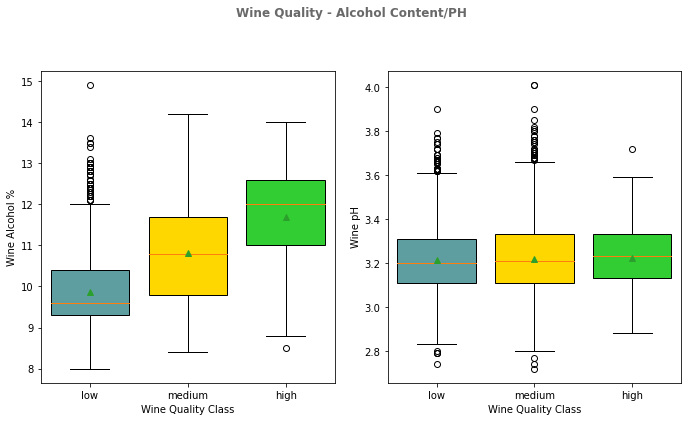

In [ ]:
# First we generate data

# here we generate data for comparing the wine qualities and the *alcohol* content
alc_vs_quality_low = wines[wines["quality_label"] == "low"]["alcohol"]
alc_vs_quality_mid = wines[wines["quality_label"] == "medium"]["alcohol"]
alc_vs_quality_high = wines[wines["quality_label"] == "high"]["alcohol"]

alc_vs_quality = (alc_vs_quality_low , alc_vs_quality_mid, alc_vs_quality_high)

# here we generate data for comparing the wine qualities and the *ph* value

ph_vs_quality_low = wines[wines["quality_label"] == "low"]["pH"]
ph_vs_quality_mid = wines[wines["quality_label"] == "medium"]["pH"]
ph_vs_quality_high = wines[wines["quality_label"] == "high"]["pH"]

ph_vs_quality = (ph_vs_quality_low, ph_vs_quality_mid, ph_vs_quality_high)

# and create labels for the plot
labels = ['low', 'medium','high']

# Now we call the subplot function
fig3, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize= (10,6))

# now we plot
bplot1 = ax1.boxplot(alc_vs_quality, widths= 0.8, patch_artist= True, labels= labels, showmeans= True)
bplot2 = ax2.boxplot(ph_vs_quality, widths= 0.8, patch_artist= True, labels= labels, showmeans= True)

# now we make everything look nicer

#adding a super title
plt.suptitle("Wine Quality - Alcohol Content/PH", weight= "demibold", color= "dimgrey")

#let's separate the figures a bit
fig3.tight_layout(pad=3)

#adding labels for plot 1
ax1.set_xlabel("Wine Quality Class")
ax1.set_ylabel("Wine Alcohol %")

#adding labels for plot 2
ax2.set_xlabel("Wine Quality Class")
ax2.set_ylabel("Wine pH")

# filling colors
colors = ["CadetBlue", "Gold", "LimeGreen"]
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot["boxes"], colors): patch.set_facecolor(color)

plt.show()


In [ ]:
# Here we are practicing slicing and comparing features

quality_features = wines[wines.columns[0:13]].groupby(["quality_label"]).quantile()
print("The quality features of wines in general")
quality_features


The quality features of wines in general


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
quality_label,,,,,,,,,,,,
low,7.1,0.3375,0.295,2.90,0.0520,26.0,124.0,0.99600,3.20,0.50,9.6,5.0
medium,6.9,0.2700,0.310,3.00,0.0450,29.0,116.0,0.99400,3.21,0.51,10.8,6.0
high,6.8,0.2750,0.320,4.05,0.0365,34.0,118.5,0.99178,3.23,0.48,12.0,8.0


In [ ]:

quality_features_white = white_wine[white_wine.columns[0:13]].groupby(["quality_label"]).quantile()
print("\nThe quality features of white wines")
quality_features_white


The quality features of white wines


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
quality_label,,,,,,,,,,,,
low,6.8,0.29,0.32,6.625,0.0470,34.0,149.0,0.99514,3.16,0.47,9.6,5.0
medium,6.8,0.25,0.32,4.800,0.0410,33.5,129.0,0.99305,3.19,0.48,10.8,6.0
high,6.8,0.26,0.32,4.300,0.0355,34.5,122.0,0.99162,3.23,0.46,12.0,8.0


In [ ]:

quality_features_red = red_wine[red_wine.columns[0:13]].groupby(["quality_label"]).quantile()
print("\nThe quality features of red wines")
quality_features_red


The quality features of red wines


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
quality_label,,,,,,,,,,,,
low,7.80,0.59,0.22,2.2,0.0810,14.0,45.0,0.996935,3.31,0.58,9.70,5.0
medium,8.00,0.46,0.31,2.2,0.0770,13.0,33.0,0.996420,3.31,0.66,10.80,6.0
high,8.25,0.37,0.42,2.1,0.0705,7.5,21.5,0.994940,3.23,0.74,12.15,8.0


In [ ]:
# OBSERVATIONS
# Low quality white wines have a higher total sulfur on average
# Same for red wines. this could mean that the preservatives taste might be coming through
# Free Sulphur is significantly lower in high reds
# little differences in acidity levels in white wines - only volatile seems to change. Mistake or same

In [ ]:
#lets get all the low quality wines - test slicing and filtering
low_quality = wines[wines["quality_label"] == "low"]["alcohol"]

low_quality

1        9.9
6       10.2
8        9.2
10       9.1
11       9.5
        ... 
6490    11.3
6492     9.2
6494     9.5
6495     9.5
6496     9.5
Name: alcohol, Length: 2384, dtype: float64

In [ ]:
# Practising slicing with loc
wines.loc[wines["quality_label"] == "low", ["alcohol"]]

,alcohol
1,9.9
6,10.2
8,9.2
10,9.1
11,9.5
...,...
6490,11.3
6492,9.2
6494,9.5
6495,9.5


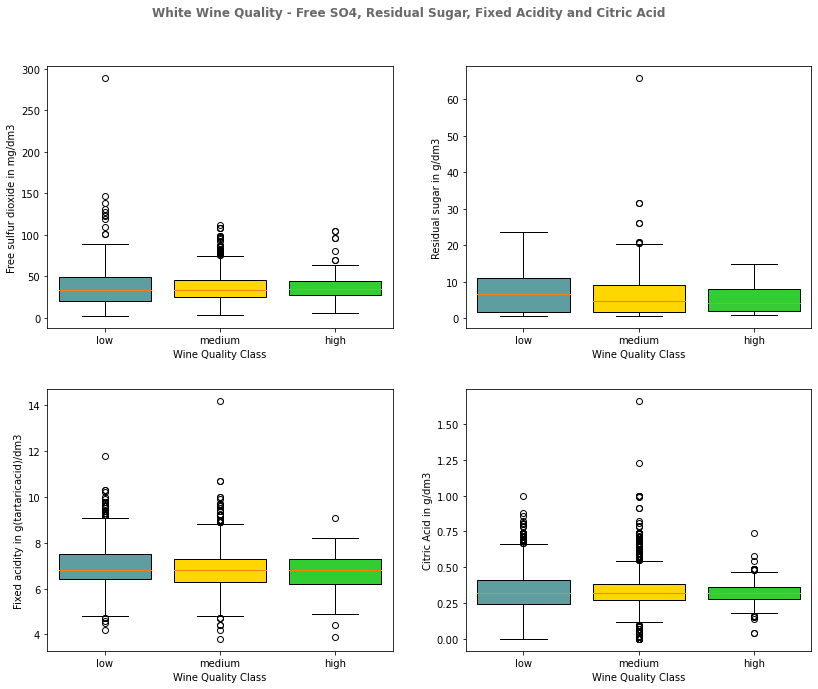

In [ ]:
# Now we will create multiple boxplots to compare the different chemical properties of WHITE WINES to quality

# here we generate data for comparing the white wine qualities and the *sulphur* content
Sul_vs_quality_low_wh = white_wine[white_wine["quality_label"] == "low"]["free_sulfur_dioxide"]
Sul_vs_quality_mid_wh = white_wine[white_wine["quality_label"] == "medium"]["free_sulfur_dioxide"]
Sul_vs_quality_high_wh = white_wine[white_wine["quality_label"] == "high"]["free_sulfur_dioxide"]

Sul_vs_quality_wh = (Sul_vs_quality_low_wh , Sul_vs_quality_mid_wh, Sul_vs_quality_high_wh)

# here we generate data for comparing the white wine qualities and the *Residual Sugar* value

Sugar_vs_quality_low_wh = white_wine[white_wine["quality_label"] == "low"]["residual_sugar"]
Sugar_vs_quality_mid_wh = white_wine[white_wine["quality_label"] == "medium"]["residual_sugar"]
Sugar_vs_quality_high_wh = white_wine[white_wine["quality_label"] == "high"]["residual_sugar"]

Sugar_vs_quality_wh = (Sugar_vs_quality_low_wh, Sugar_vs_quality_mid_wh, Sugar_vs_quality_high_wh)

# here we generate data for comparing the white wine qualities and the *fixed acidity* value

Fixed_vs_quality_low_wh = white_wine[white_wine["quality_label"] == "low"]["fixed_acidity"]
Fixed_vs_quality_mid_wh = white_wine[white_wine["quality_label"] == "medium"]["fixed_acidity"]
Fixed_vs_quality_high_wh = white_wine[white_wine["quality_label"] == "high"]["fixed_acidity"]

fixed_vs_quality_wh = (Fixed_vs_quality_low_wh, Fixed_vs_quality_mid_wh, Fixed_vs_quality_high_wh)

# here we generate data for comparing the white wine qualities and the *Citric Acid* value

Citric_vs_quality_low_wh = white_wine[white_wine["quality_label"] == "low"]["citric_acid"]
Citric_vs_quality_mid_wh = white_wine[white_wine["quality_label"] == "medium"]["citric_acid"]
Citric_vs_quality_high_wh = white_wine[white_wine["quality_label"] == "high"]["citric_acid"]

Citric_vs_quality_wh = (Citric_vs_quality_low_wh, Citric_vs_quality_mid_wh, Citric_vs_quality_high_wh)

# and create labels for the plot
labels = ['low', 'medium','high']

# Now we call the subplot function
fig4, ((ax3, ax4), (ax5, ax6)) = plt.subplots(nrows= 2, ncols= 2, figsize= (12,10))

# now we plot 3
bplot3 = ax3.boxplot(Sul_vs_quality_wh, widths= 0.8, patch_artist= True, labels= labels)
ax3.set_xlabel("Wine Quality Class")
ax3.set_ylabel("Free sulfur dioxide in mg/dm3")

# now we plot 4
bplot4 = ax4.boxplot(Sugar_vs_quality_wh, widths= 0.8, patch_artist= True, labels= labels)
ax4.set_xlabel("Wine Quality Class")
ax4.set_ylabel("Residual sugar in g/dm3")

# now we plot 5
bplot5 = ax5.boxplot(fixed_vs_quality_wh, widths= 0.8, patch_artist= True, labels= labels)
ax5.set_xlabel("Wine Quality Class")
ax5.set_ylabel("Fixed acidity in g(tartaricacid)/dm3")

# now we plot 6

bplot6 = ax6.boxplot(Citric_vs_quality_wh, widths= 0.8, patch_artist= True, labels= labels)
ax6.set_xlabel("Wine Quality Class")
ax6.set_ylabel("Citric Acid in g/dm3")

# now we make everything look nicer

#adding a super title
plt.suptitle("White Wine Quality - Free SO4, Residual Sugar, Fixed Acidity and Citric Acid", weight= "demibold", color= "dimgrey")

#let's separate the figures a bit
fig4.tight_layout(pad=3)

# filling colors
colors = ["CadetBlue", "Gold", "LimeGreen"]
for bplot in (bplot3, bplot4, bplot5, bplot6):
    for patch, color in zip(bplot["boxes"], colors): patch.set_facecolor(color)

plt.show()

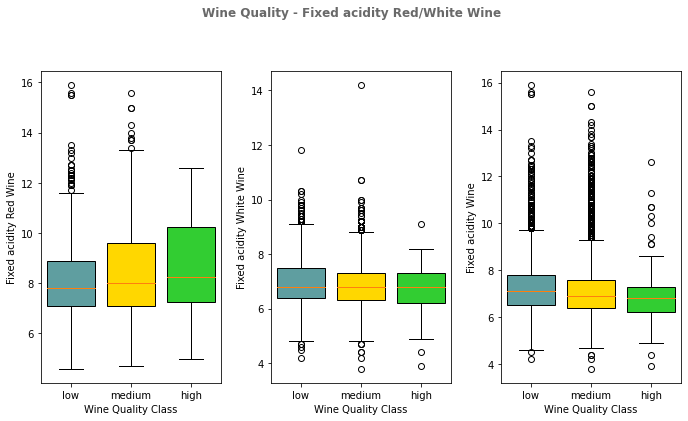

In [ ]:
# here we generate data for comparing the red wine qualities and the *fixed acidity* content
red_fix_quality_low = red_wine[red_wine["quality_label"] == "low"]["fixed_acidity"]
red_fix_quality_mid = red_wine[red_wine["quality_label"] == "medium"]["fixed_acidity"]
red_fix_quality_high = red_wine[red_wine["quality_label"] == "high"]["fixed_acidity"]

red_fix_quality = (red_fix_quality_low , red_fix_quality_mid, red_fix_quality_high)

# here we generate data for comparing the white wine qualities and the *fixed acidity* value

white_fix_quality_low = white_wine[white_wine["quality_label"] == "low"]["fixed_acidity"]
white_fix_quality_mid = white_wine[white_wine["quality_label"] == "medium"]["fixed_acidity"]
white_fix_quality_high = white_wine[white_wine["quality_label"] == "high"]["fixed_acidity"]

white_fix_quality = (white_fix_quality_low , white_fix_quality_mid, white_fix_quality_high)

# here we generate data for comparing the wine qualities and the *fixed acidity* value

fix_vs_quality_low = wines[wines["quality_label"] == "low"]["fixed_acidity"]
fix_vs_quality_mid = wines[wines["quality_label"] == "medium"]["fixed_acidity"]
fix_vs_quality_high = wines[wines["quality_label"] == "high"]["fixed_acidity"]

fix_vs_fix_quality = (fix_vs_quality_low , fix_vs_quality_mid, fix_vs_quality_high)

# and create labels for the plot
labels = ['low', 'medium','high']

# Now we call the subplot function
fig4, (ax3, ax4, ax8) = plt.subplots(nrows= 1, ncols= 3, figsize= (10,6))

# now we plot
bplot3 = ax3.boxplot(red_fix_quality, widths= 0.8, patch_artist= True, labels= labels)
bplot4 = ax4.boxplot(white_fix_quality, widths= 0.8, patch_artist= True, labels= labels)
bplot8 = ax8.boxplot(fix_vs_fix_quality, widths= 0.8, patch_artist= True, labels= labels)

#adding title
plt.suptitle("Wine Quality - Fixed acidity Red/White Wine", weight= "demibold", color= "dimgrey")

#let's separate the figures a bit
fig4.tight_layout(pad=3)

#adding labels for plot 1
ax3.set_xlabel("Wine Quality Class")
ax3.set_ylabel("Fixed acidity Red Wine")

#adding labels for plot 2
ax4.set_xlabel("Wine Quality Class")
ax4.set_ylabel("Fixed acidity White Wine")

#adding labels for plot 3
ax8.set_xlabel("Wine Quality Class")
ax8.set_ylabel("Fixed acidity Wine")

# filling colors
colors = ["CadetBlue", "Gold", "LimeGreen"]
for bplot in (bplot3, bplot4, bplot8):
    for patch, color in zip(bplot["boxes"], colors): patch.set_facecolor(color)

plt.show()

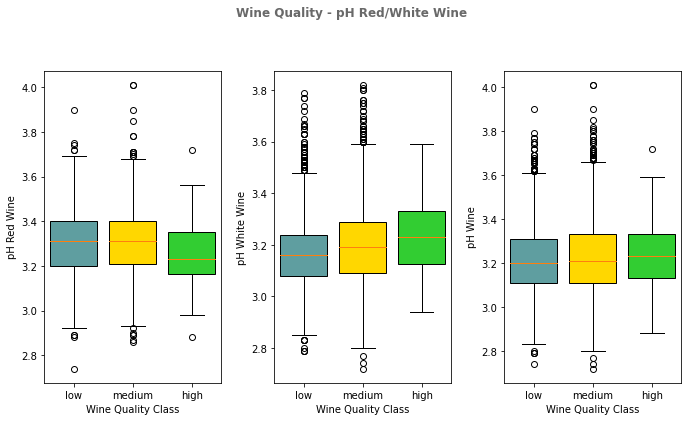

In [ ]:
# First we generate data

# here we generate data for comparing the red wine qualities and the *fixed acidity* content
red_fix_quality_low = red_wine[red_wine["quality_label"] == "low"]["pH"]
red_fix_quality_mid = red_wine[red_wine["quality_label"] == "medium"]["pH"]
red_fix_quality_high = red_wine[red_wine["quality_label"] == "high"]["pH"]

red_fix_quality = (red_fix_quality_low , red_fix_quality_mid, red_fix_quality_high)

# here we generate data for comparing the white wine qualities and the *fixed acidity* value

white_fix_quality_low = white_wine[white_wine["quality_label"] == "low"]["pH"]
white_fix_quality_mid = white_wine[white_wine["quality_label"] == "medium"]["pH"]
white_fix_quality_high = white_wine[white_wine["quality_label"] == "high"]["pH"]

white_fix_quality = (white_fix_quality_low , white_fix_quality_mid, white_fix_quality_high)

# here we generate data for comparing the wine qualities and the *fixed acidity* value

fix_vs_quality_low = wines[wines["quality_label"] == "low"]["pH"]
fix_vs_quality_mid = wines[wines["quality_label"] == "medium"]["pH"]
fix_vs_quality_high = wines[wines["quality_label"] == "high"]["pH"]

fix_vs_fix_quality = (fix_vs_quality_low , fix_vs_quality_mid, fix_vs_quality_high)

# and create labels for the plot
labels = ['low', 'medium','high']

# Now we call the subplot function
fig4, (ax3, ax4, ax8) = plt.subplots(nrows= 1, ncols= 3, figsize= (10,6))

# now we plot
bplot3 = ax3.boxplot(red_fix_quality, widths= 0.8, patch_artist= True, labels= labels)
bplot4 = ax4.boxplot(white_fix_quality, widths= 0.8, patch_artist= True, labels= labels)
bplot8 = ax8.boxplot(fix_vs_fix_quality, widths= 0.8, patch_artist= True, labels= labels)

#adding title
plt.suptitle("Wine Quality - pH Red/White Wine", weight= "demibold", color= "dimgrey")

#let's separate the figures a bit
fig4.tight_layout(pad=3)

#adding labels for plot 1
ax3.set_xlabel("Wine Quality Class")
ax3.set_ylabel("pH Red Wine")

#adding labels for plot 2
ax4.set_xlabel("Wine Quality Class")
ax4.set_ylabel("pH White Wine")

#adding labels for plot 3
ax8.set_xlabel("Wine Quality Class")
ax8.set_ylabel("pH Wine")

# filling colors
colors = ["CadetBlue", "Gold", "LimeGreen"]
for bplot in (bplot3, bplot4, bplot8):
    for patch, color in zip(bplot["boxes"], colors): patch.set_facecolor(color)

plt.show()


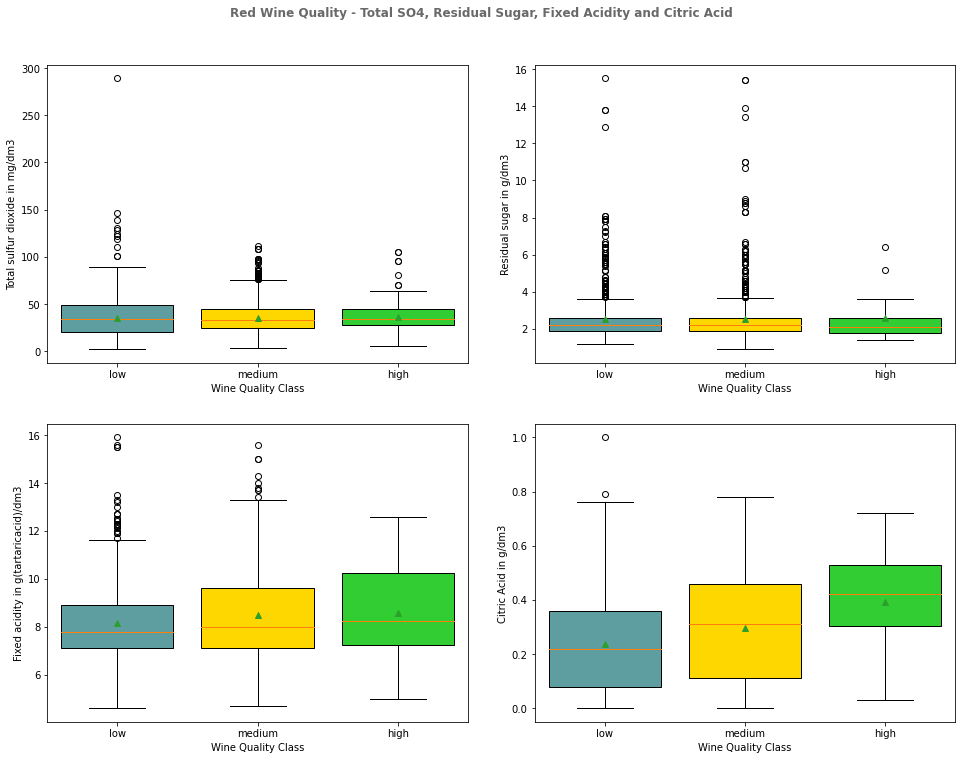

In [ ]:
# Now we will create multiple boxplots to compare the different chemical properties of RED WINES to quality

# here we generate data for comparing the white wine qualities and the *sulphur* content
Sul_vs_quality_low_red = red_wine[red_wine["quality_label"] == "low"]["total_sulfur_dioxide"]
Sul_vs_quality_mid_red = red_wine[red_wine["quality_label"] == "medium"]["total_sulfur_dioxide"]
Sul_vs_quality_high_red = red_wine[red_wine["quality_label"] == "high"]["total_sulfur_dioxide"]

Sul_vs_quality_red = (Sul_vs_quality_low_red , Sul_vs_quality_mid_red, Sul_vs_quality_high_red)

# here we generate data for comparing the white wine qualities and the *Residual Sugar* value

Sugar_vs_quality_low_red = red_wine[red_wine["quality_label"] == "low"]["residual_sugar"]
Sugar_vs_quality_mid_red = red_wine[red_wine["quality_label"] == "medium"]["residual_sugar"]
Sugar_vs_quality_high_red = red_wine[red_wine["quality_label"] == "high"]["residual_sugar"]

Sugar_vs_quality_wh = (Sugar_vs_quality_low_red, Sugar_vs_quality_mid_red, Sugar_vs_quality_high_red)

# here we generate data for comparing the white wine qualities and the *fixed acidity* value

Fixed_vs_quality_low_red = red_wine[red_wine["quality_label"] == "low"]["fixed_acidity"]
Fixed_vs_quality_mid_red = red_wine[red_wine["quality_label"] == "medium"]["fixed_acidity"]
Fixed_vs_quality_high_red = red_wine[red_wine["quality_label"] == "high"]["fixed_acidity"]

fixed_vs_quality_wh = (Fixed_vs_quality_low_red, Fixed_vs_quality_mid_red, Fixed_vs_quality_high_red)

# here we generate data for comparing the white wine qualities and the *Citric Acid* value

Citric_vs_quality_low_red = red_wine[red_wine["quality_label"] == "low"]["citric_acid"]
Citric_vs_quality_mid_red = red_wine[red_wine["quality_label"] == "medium"]["citric_acid"]
Citric_vs_quality_high_red = red_wine[red_wine["quality_label"] == "high"]["citric_acid"]

Citric_vs_quality_wh = (Citric_vs_quality_low_red, Citric_vs_quality_mid_red, Citric_vs_quality_high_red)

# and create labels for the plot
labels = ['low', 'medium','high']

# Now we call the subplot function
fig5, ((ax3, ax4), (ax5, ax6)) = plt.subplots(nrows= 2, ncols= 2, figsize= (14,11))

# now we plot 3
bplot3 = ax3.boxplot(Sul_vs_quality_wh, widths= 0.8, patch_artist= True, labels= labels, showmeans= True)
ax3.set_xlabel("Wine Quality Class")
ax3.set_ylabel("Total sulfur dioxide in mg/dm3")

# now we plot 4
bplot4 = ax4.boxplot(Sugar_vs_quality_wh, widths= 0.8, patch_artist= True, labels= labels, showmeans= True)
ax4.set_xlabel("Wine Quality Class")
ax4.set_ylabel("Residual sugar in g/dm3")

# now we plot 5
bplot5 = ax5.boxplot(fixed_vs_quality_wh, widths= 0.8, patch_artist= True, labels= labels, showmeans= True)
ax5.set_xlabel("Wine Quality Class")
ax5.set_ylabel("Fixed acidity in g(tartaricacid)/dm3")

# now we plot 6

bplot6 = ax6.boxplot(Citric_vs_quality_wh, widths= 0.8, patch_artist= True, labels= labels, showmeans= True)
ax6.set_xlabel("Wine Quality Class")
ax6.set_ylabel("Citric Acid in g/dm3")

# now we make everything look nicer

#adding a super title
plt.suptitle("Red Wine Quality - Total SO4, Residual Sugar, Fixed Acidity and Citric Acid", weight= "demibold", color= "dimgrey")

#let's separate the figures a bit
fig5.tight_layout(pad=3)

# filling colors
colors = ["CadetBlue", "Gold", "LimeGreen"]
for bplot in (bplot3, bplot4, bplot5, bplot6):
    for patch, color in zip(bplot["boxes"], colors): patch.set_facecolor(color)

plt.show()

In [ ]:
# Now the statistics show begins :D

# applying ANOVA to prove if mean alcohol level vary significantly among the low quality, medium quality and high quality wines?

F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['alcohol'],
wines[wines['quality_label'] == 'medium']['alcohol'],
wines[wines['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

#####What is the Ho Hypothesis in this case? 
# Ho = The mean alcohol levels are the same among all the quality levels! ##
# The result tells us that there is a statistically significant difference in alcohol level means because p-value is smaller that =0.05 (hence, rejecting the null hypothesis in favor of the alternative).
# High F Statistic Value means most of the variation comes from between the groups
# Alchohol plays a role in quality in quality because mean varies



ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 673.0745347231032 	p-value: 2.2715337450621843e-266


In [ ]:
# applying ANOVA to prove if mean residual sugar levels vary significantly among the low quality, medium quality and high quality wines?


F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['residual_sugar'],
wines[wines['quality_label'] == 'medium']['residual_sugar'],
wines[wines['quality_label'] == 'high']['residual_sugar'])
print('ANOVA test for mean residual sugar levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

# p-value is relatively small but close to the threshhold. Hence statistically the means are not equal across the groups. Residual sugar has staitiscal significant impact on wines quality in general.
# But maybe little impact compared to other wines?

ANOVA test for mean residual sugar levels across wine samples with different quality ratings
F Statistic: 3.432938987382213 	p-value: 0.032350509691691995


In [ ]:
# applying ANOVA to prove if mean free S04 levels vary significantly among the low quality, medium quality and high quality wines?


F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['free_sulfur_dioxide'],
wines[wines['quality_label'] == 'medium']['free_sulfur_dioxide'],
wines[wines['quality_label'] == 'high']['free_sulfur_dioxide'])
print('ANOVA test for mean free SO4 across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

# p-value is small and f statistic high, signalling the Ho can be rejected. Hence free So4 has significant impact on wines quality in general.

ANOVA test for mean free SO4 across wine samples with different quality ratings
F Statistic: 10.312540552928878 	p-value: 3.3761187237755544e-05


In [ ]:
#The code above is tedious to write if we want to check all the features for their significance, so we shorten everything with a for loop.

for (X) in wines.iloc[:,:-3]:
    F, p = stats.f_oneway(wines[wines['quality_label'] == 'low'][X],
    wines[wines['quality_label'] == 'medium'][X],
    wines[wines['quality_label'] == 'high'][X])
    print("ANOVA test for mean", X, "across all wines with different quality ratings")
    print('F Statistic:', F, '\tp-value:', p, "\n")


# Low F Statistic means most of the variation comes from within the groups. In combination with the high p-Value,
# p-value is high, meaning there is statistically no significant difference in mean pH levels between the groups. Cant reject null Hypothesis. Means are equal, there is no difference

# Note to self:
# Crticical Value syntax (1 - p value, (Groups - 1 => dfn: The numerator degrees of freedom), (dfd: The denominator degrees of freedom - groups) (so between groups/ within groups))

ANOVA test for mean fixed_acidity across all wines with different quality ratings
F Statistic: 20.381638498376496 	p-value: 1.4997963980511249e-09 

ANOVA test for mean volatile_acidity across all wines with different quality ratings
F Statistic: 250.3391447532201 	p-value: 1.8472285967281885e-105 

ANOVA test for mean citric_acid across all wines with different quality ratings
F Statistic: 18.9689014227371 	p-value: 6.1077442166569355e-09 

ANOVA test for mean residual_sugar across all wines with different quality ratings
F Statistic: 3.432938987382213 	p-value: 0.032350509691691995 

ANOVA test for mean chlorides across all wines with different quality ratings
F Statistic: 120.96013685200977 	p-value: 2.645627533466762e-52 

ANOVA test for mean free_sulfur_dioxide across all wines with different quality ratings
F Statistic: 10.312540552928878 	p-value: 3.3761187237755544e-05 

ANOVA test for mean total_sulfur_dioxide across all wines with different quality ratings
F Statistic: 7.8368

In [ ]:
# We want to compare the different wines (red/white). 
# Now we check for significance depending on the wine type.
# First white wine
for X in white_wine.iloc[:,:-3]:
    F, p = stats.f_oneway(white_wine[white_wine['quality_label'] == 'low'][X],
    white_wine[white_wine['quality_label'] == 'medium'][X],
    white_wine[white_wine['quality_label'] == 'high'][X])
    print("ANOVA test for mean", X, "across white wine samples with different quality ratings")
    print('F Statistic:', F, '\tp-value:', p, "\n")

ANOVA test for mean fixed_acidity across white wine samples with different quality ratings
F Statistic: 21.923026494425756 	p-value: 3.321537387880916e-10 

ANOVA test for mean volatile_acidity across white wine samples with different quality ratings
F Statistic: 133.6668084396585 	p-value: 3.012823078922054e-57 

ANOVA test for mean citric_acid across white wine samples with different quality ratings
F Statistic: 0.23254245986965996 	p-value: 0.7925248530727159 

ANOVA test for mean residual_sugar across white wine samples with different quality ratings
F Statistic: 21.934773835107606 	p-value: 3.2830889157949124e-10 

ANOVA test for mean chlorides across white wine samples with different quality ratings
F Statistic: 90.87064418602546 	p-value: 1.7797433543986758e-39 

ANOVA test for mean free_sulfur_dioxide across white wine samples with different quality ratings
F Statistic: 0.5909833608324854 	p-value: 0.5538219567015075 

ANOVA test for mean total_sulfur_dioxide across white wine 

In [ ]:
# For White Wines there is no statistically, significant impact because of high p-value for the ff. properties  => Citric Acid, Free Sulfur Dioxide
# For White Wines there is statistically, significant impact because of low p-value for the ff. properties  => alcohol, sulphates, density, pH and all the others.

In [ ]:
# In general the chemical components have higher impact in red wines as compared to white wines

In [ ]:
# Now we check for significance depending on the wine type using a loop to go over the columns
# Here we check red wines
# fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol

for (X) in red_wine.iloc[:,:-3]:
    F, p = stats.f_oneway(red_wine[red_wine['quality_label'] == 'low'][X],
    wines[wines['quality_label'] == 'medium'][X],
    wines[wines['quality_label'] == 'high'][X])
    print("ANOVA test for mean", X, "across red wine samples with different quality ratings")
    print('F Statistic:', F, '\tp-value:', p, "\n")


ANOVA test for mean fixed_acidity across red wine samples with different quality ratings
F Statistic: 175.52759780190877 	p-value: 2.511009314426464e-74 

ANOVA test for mean volatile_acidity across red wine samples with different quality ratings
F Statistic: 1194.9348296556811 	p-value: 0.0 

ANOVA test for mean citric_acid across red wine samples with different quality ratings
F Statistic: 124.42169336211056 	p-value: 2.012989490792404e-53 

ANOVA test for mean residual_sugar across red wine samples with different quality ratings
F Statistic: 130.60027190902545 	p-value: 5.681440178218567e-56 

ANOVA test for mean chlorides across red wine samples with different quality ratings
F Statistic: 484.3574488470743 	p-value: 1.601383080628506e-192 

ANOVA test for mean free_sulfur_dioxide across red wine samples with different quality ratings
F Statistic: 277.43507981661327 	p-value: 8.21361819602131e-115 

ANOVA test for mean total_sulfur_dioxide across red wine samples with different qual

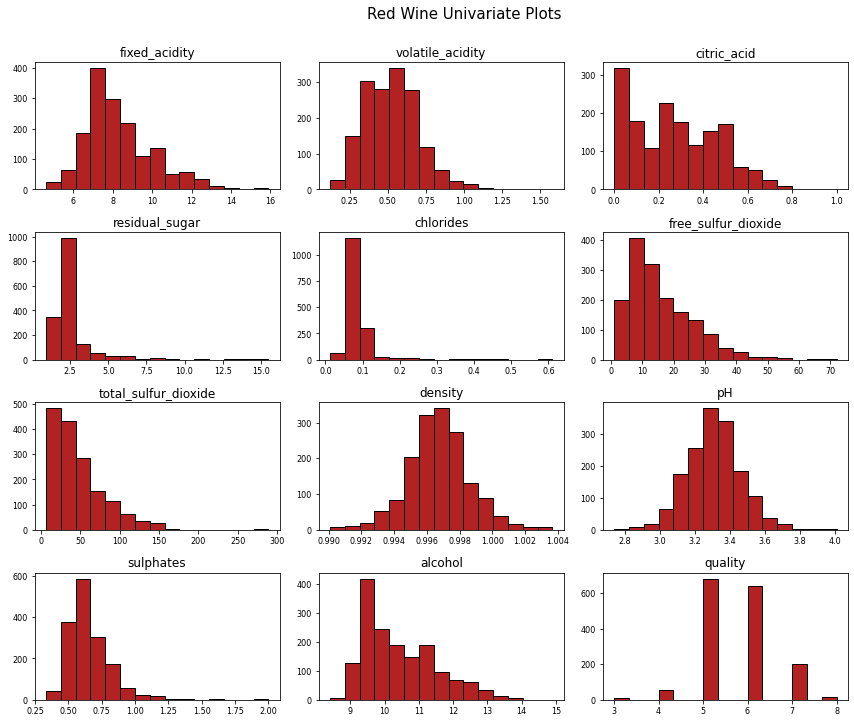

In [ ]:
# Epic 2 Univariate Analysis

red_wine.hist(bins=15, color='FireBrick', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False, figsize= (10,8))

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)


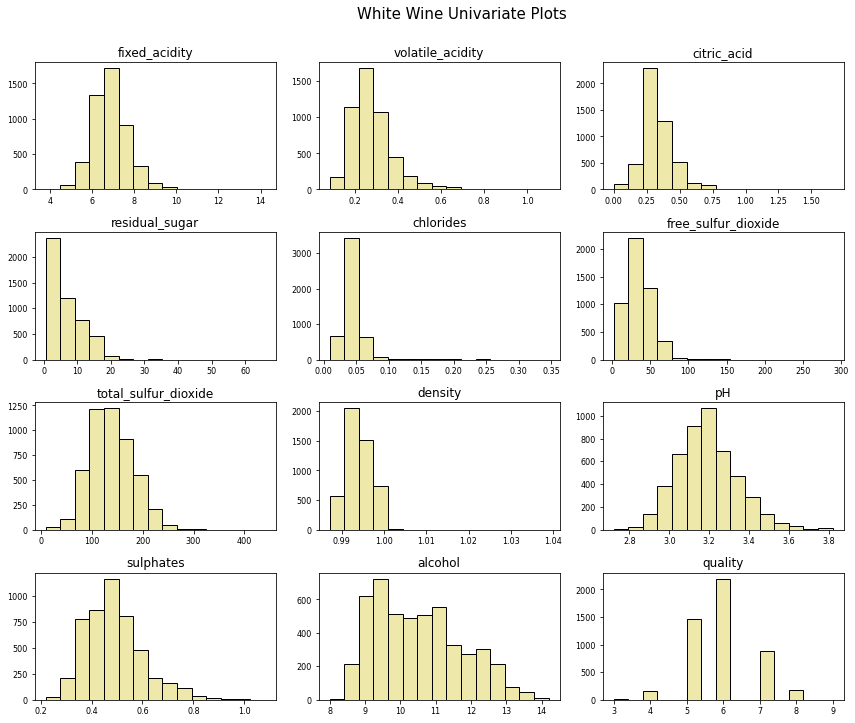

In [ ]:
# Epic 2 Univariate Analysis

white_wine.hist(bins=15, color='PaleGoldenRod', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False, figsize= (10,8))

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('White Wine Univariate Plots ', x=0.65, y=1.25, fontsize=15)

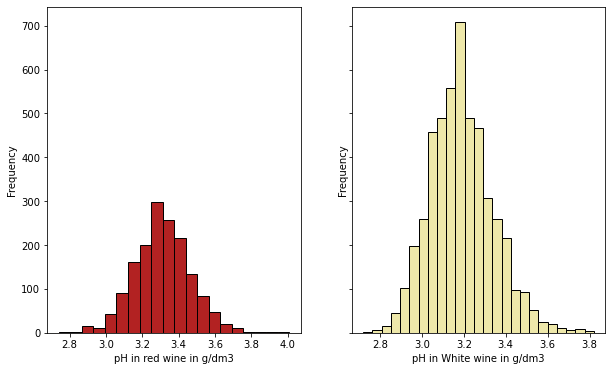

In [ ]:
# Comparing singular red and white features with each other
fig, (ax1,ax2)  = plt.subplots(nrows=1, ncols=2, sharey = True,figsize= (10,6))

ax1.hist(red_wine["pH"], bins=20, color='FireBrick', edgecolor='black', linewidth=1.0, )
ax1.set_ylabel("Frequency")
ax1.set_xlabel("pH in red wine in g/dm3")

ax2.hist(white_wine["pH"],bins=25, color='PaleGoldenRod', edgecolor='black', linewidth=1.0)
ax2.set_ylabel("Frequency")
ax2.set_xlabel("pH in White wine in g/dm3")

plt.show()

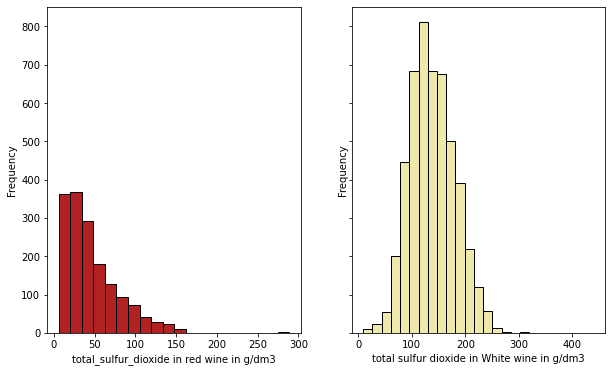

In [ ]:
# Comparing singular red and white features with each other
fig, (ax1,ax2)  = plt.subplots(nrows=1, ncols=2, sharey = True,figsize= (10,6))

ax1.hist(red_wine["total_sulfur_dioxide"], bins=20, color='FireBrick', edgecolor='black', linewidth=1.0, )
ax1.set_ylabel("Frequency")
ax1.set_xlabel("total_sulfur_dioxide in red wine in g/dm3")

ax2.hist(white_wine["total_sulfur_dioxide"],bins=25, color='PaleGoldenRod', edgecolor='black', linewidth=1.0)
ax2.set_ylabel("Frequency")
ax2.set_xlabel("total sulfur dioxide in White wine in g/dm3")

plt.show()

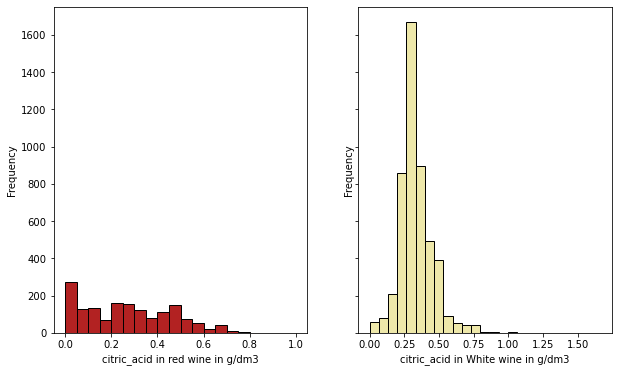

In [ ]:
# Comparing singular red and white features with each other
fig, (ax1,ax2)  = plt.subplots(nrows=1, ncols=2, sharey = True,figsize= (10,6))

ax1.hist(red_wine["citric_acid"], bins=20, color='FireBrick', edgecolor='black', linewidth=1.0, )
ax1.set_ylabel("Frequency")
ax1.set_xlabel("citric_acid in red wine in g/dm3")

ax2.hist(white_wine["citric_acid"],bins=25, color='PaleGoldenRod', edgecolor='black', linewidth=1.0)
ax2.set_ylabel("Frequency")
ax2.set_xlabel("citric_acid in White wine in g/dm3")

plt.show()

# the two wines behave differendtly.

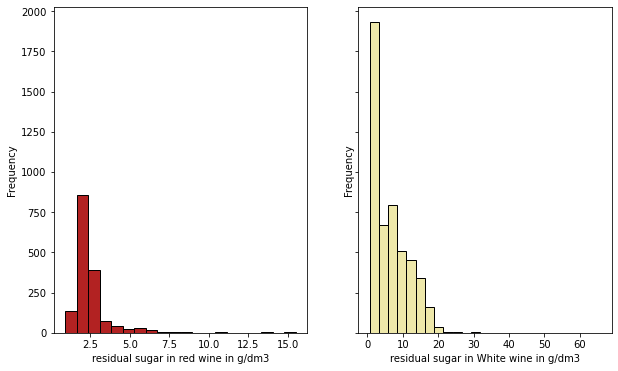

In [ ]:
# Comparing singular red and white features with each other
fig, (ax1,ax2)  = plt.subplots(nrows=1, ncols=2, sharey = True,figsize= (10,6))

ax1.hist(red_wine["residual_sugar"], bins=20, color='FireBrick', edgecolor='black', linewidth=1.0, )
ax1.set_ylabel("Frequency")
ax1.set_xlabel("residual sugar in red wine in g/dm3")

ax2.hist(white_wine["residual_sugar"],bins=25, color='PaleGoldenRod', edgecolor='black', linewidth=1.0)
ax2.set_ylabel("Frequency")
ax2.set_xlabel("residual sugar in White wine in g/dm3")

plt.show()

In [ ]:
wines.select_dtypes('number')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5


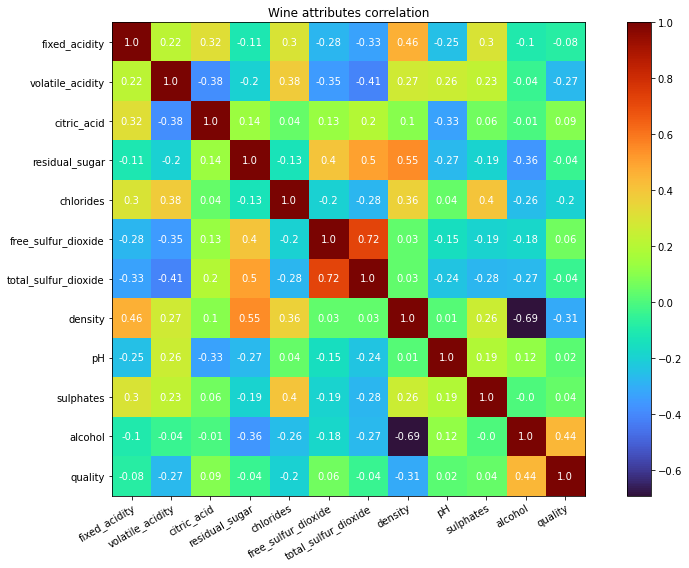

In [ ]:
# Creating a heatmap

only_numeric = wines.select_dtypes('number')  #getting only the numeric columns

features_array = only_numeric.corr(method= "pearson").to_numpy().round(decimals= 2) #converting to array for plotting

fig, ax = plt.subplots(figsize= (12,8))
im = ax.imshow(features_array, cmap="turbo")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(only_numeric.columns)),labels=only_numeric.columns)
ax.set_yticks(np.arange(len(only_numeric.columns)),labels=only_numeric.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
         rotation_mode="anchor")

# adding a color bar
ax.figure.colorbar(im, ax=ax)


# Loop over data dimensions and create text annotations.
for i in range(len(only_numeric.columns)):
    for j in range(len(only_numeric.columns)):
        text = ax.text(j, i, features_array[i, j],
                       ha="center", va="center", color="w")

#adding title and layout
ax.set_title("Wine attributes correlation")
fig.tight_layout()
plt.show()

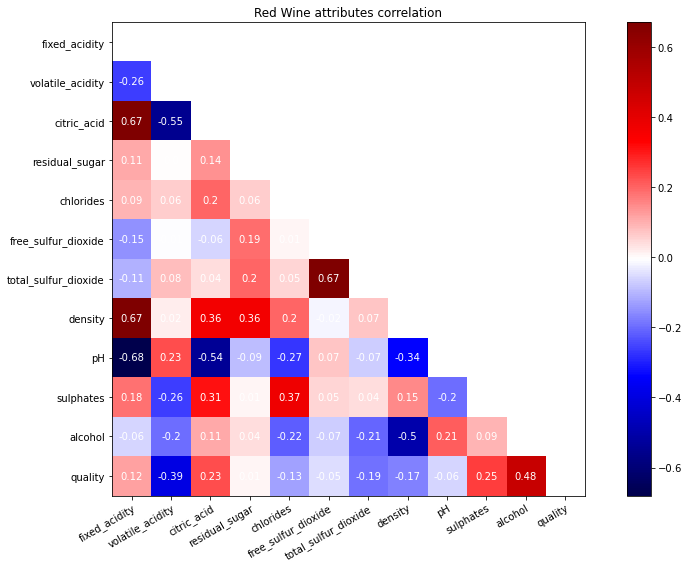

In [ ]:
# Creating a heatmap for red wine attributes

only_numeric_red = red_wine.select_dtypes('number')  #getting only the numeric columns

features_array_red = only_numeric_red.corr(method= "pearson").to_numpy().round(decimals= 2) #converting to array for plotting

#We create masks for better visibility
mask = np.zeros_like(features_array_red, dtype=bool)
mask[np.triu_indices_from(mask)] = True
features_masked_red = np.ma.masked_array(features_array_red, mask)

fig, ax = plt.subplots(figsize= (12,8))
im = ax.imshow(features_masked_red, cmap="seismic")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(only_numeric_red.columns)),labels=only_numeric_red.columns)
ax.set_yticks(np.arange(len(only_numeric_red.columns)),labels=only_numeric_red.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
         rotation_mode="anchor")

# adding a color bar
ax.figure.colorbar(im, ax=ax)


# Loop over data dimensions and create text annotations.
for i in range(len(only_numeric_red.columns)):
    for j in range(len(only_numeric_red.columns)):
        text = ax.text(j, i, features_array_red[i, j],
                       ha="center", va="center", color="w")

#adding title and layout
ax.set_title("Red Wine attributes correlation")
fig.tight_layout()
plt.show()

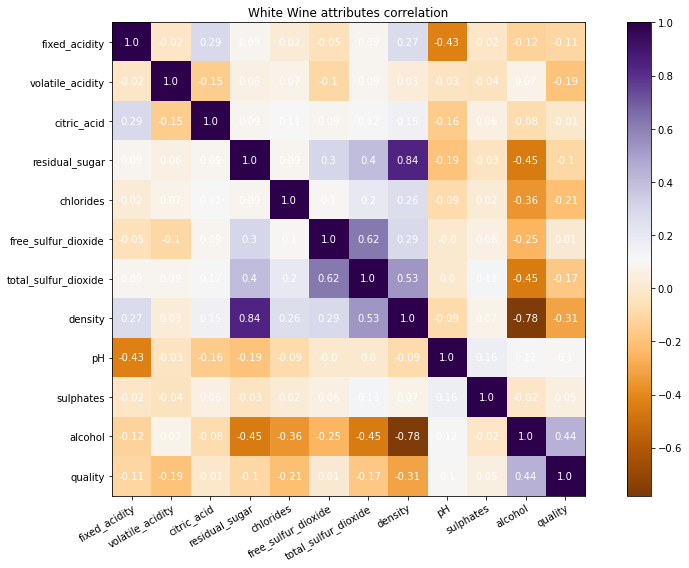

In [ ]:
# Creating a heatmap for white wine attributes

only_numeric_wh = white_wine.select_dtypes('number')  #getting only the numeric columns

features_array_wh = only_numeric_wh.corr(method= "pearson").to_numpy().round(decimals= 2) #converting to array for plotting

fig, ax = plt.subplots(figsize= (12,8))
im = ax.imshow(features_array_wh, cmap="PuOr")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(only_numeric_wh.columns)),labels=only_numeric_wh.columns)
ax.set_yticks(np.arange(len(only_numeric_wh.columns)),labels=only_numeric_wh.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
         rotation_mode="anchor")

# adding a color bar
ax.figure.colorbar(im, ax=ax)

# Loop over data dimensions and create text annotations.
for i in range(len(only_numeric_wh.columns)):
    for j in range(len(only_numeric_wh.columns)):
        text = ax.text(j, i, features_array_wh[i, j],
                       ha="center", va="center", color="w")

#adding title and layout
ax.set_title("White Wine attributes correlation")
fig.tight_layout()
plt.show()

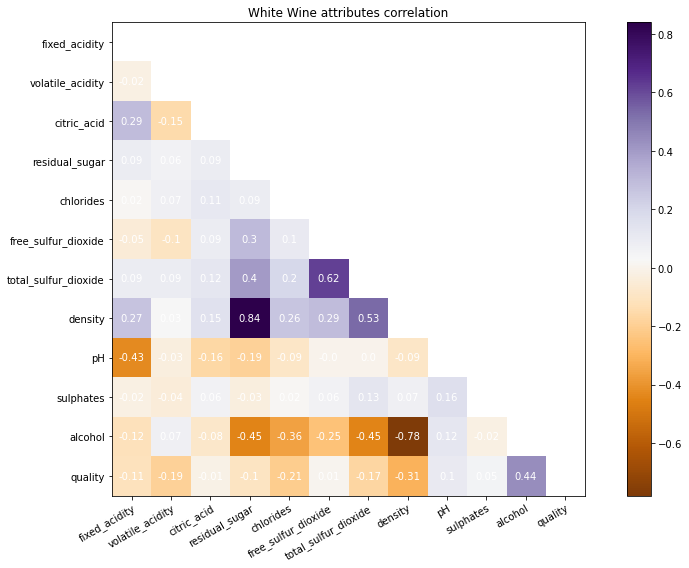

In [ ]:
# Creating a masked heatmap for white wine attributes

only_numeric = white_wine.select_dtypes('number')  #getting only the numeric columns

features_array = only_numeric.corr(method= "pearson").to_numpy().round(decimals= 2) #converting to array for plotting

#We create masks for better visibility
mask = np.zeros_like(features_array, dtype=bool)
mask[np.triu_indices_from(mask)] = True
features_array_masked = np.ma.masked_array(features_array, mask)

# We call the subplot function and start plotting
fig, ax = plt.subplots(figsize= (12,8))
im = ax.imshow(features_array_masked, cmap="PuOr")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(only_numeric.columns)),labels=only_numeric.columns)
ax.set_yticks(np.arange(len(only_numeric.columns)),labels=only_numeric.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
         rotation_mode="anchor")

# adding a color bar
ax.figure.colorbar(im, ax=ax)

# Loop over data dimensions and create text annotations.
for i in range(len(only_numeric.columns)):
    for j in range(len(only_numeric.columns)):
        text = ax.text(j, i, features_array[i, j],
                       ha="center", va="center", color="w")


#adding title and layout
ax.set_title("White Wine attributes correlation")
fig.tight_layout()
plt.show()

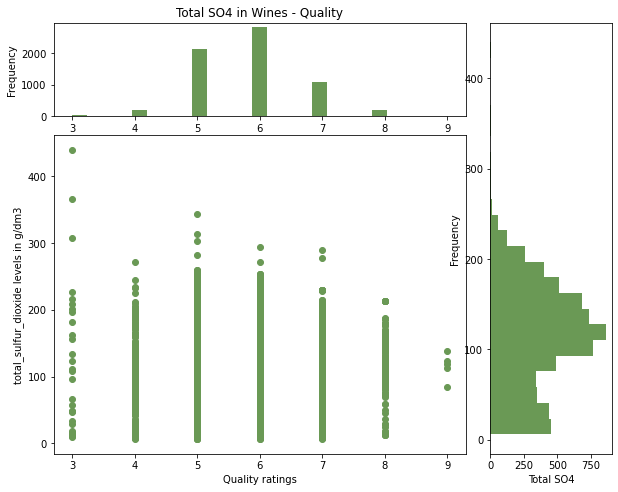

In [ ]:
fig = plt.figure(figsize= (10,10))
gs = GridSpec(5,4)

ax_scatter = fig.add_subplot(gs[2:5, 0:3])
ax_hist_y = fig.add_subplot(gs[1,0:3])
ax_hist_x = fig.add_subplot(gs[1:5,3])

ax_scatter.scatter(wines["quality"], wines["total_sulfur_dioxide"], color='#6A9955')
ax_scatter.set_xlabel("Quality ratings")
ax_scatter.set_ylabel("total_sulfur_dioxide levels in g/dm3")

ax_hist_y.hist(wines["quality"],bins=25, color='#6A9955')
ax_hist_y.set_ylabel("Frequency")
ax_hist_y.set_title("Total SO4 in Wines - Quality")


ax_hist_x.hist(wines["total_sulfur_dioxide"],bins=25, color='#6A9955', orientation= "horizontal")
ax_hist_x.set_xlabel("Total SO4")
ax_hist_x.set_ylabel("Frequency")

plt.show()

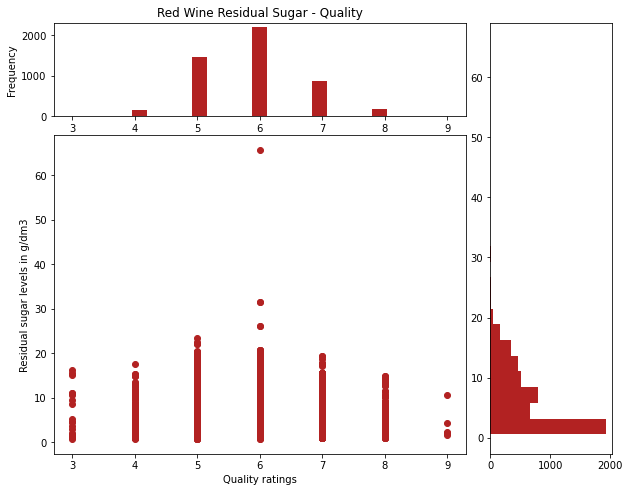

In [ ]:
fig = plt.figure(figsize= (10,10))
gs = GridSpec(5,4)

ax_scatter = fig.add_subplot(gs[2:5, 0:3])
ax_hist_y = fig.add_subplot(gs[1,0:3])
ax_hist_x = fig.add_subplot(gs[1:5,3])

ax_scatter.scatter(white_wine["quality"], white_wine["residual_sugar"], color='FireBrick')
ax_scatter.set_xlabel("Quality ratings")
ax_scatter.set_ylabel("Residual sugar levels in g/dm3")

ax_hist_y.hist(white_wine["quality"],bins=25, color='FireBrick')
ax_hist_y.set_ylabel("Frequency")
ax_hist_y.set_title("Red Wine Residual Sugar - Quality")

ax_hist_x.hist(white_wine["residual_sugar"],bins=25, color='FireBrick', orientation= "horizontal")

plt.show()

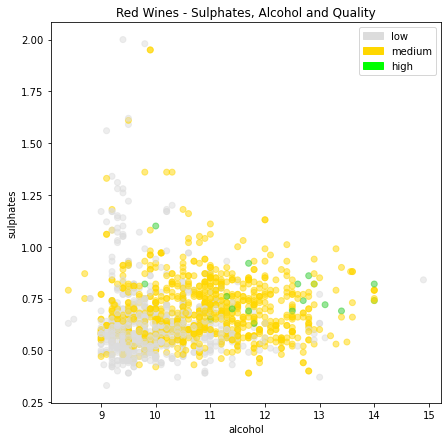

In [ ]:
# checking out three variables with scatterplots

colors = {"low": "Gainsboro", "medium": "Gold", "high": "LimeGreen"} 

fig, ax = plt.subplots(figsize = (7,7))
scatter = ax.scatter(red_wine["alcohol"], red_wine["sulphates"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("alcohol", fontsize=10)
ax.set_ylabel("sulphates", fontsize=10)
ax.set_title('Red Wines - Sulphates, Alcohol and Quality')

low_quality = mpatches.Patch(color='Gainsboro', label='low')
medium_quality = mpatches.Patch(color='Gold', label='medium')
high_quality = mpatches.Patch(color='Lime', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

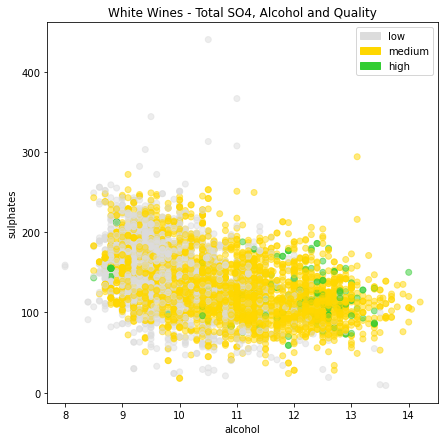

In [ ]:

colors = {"low": "Gainsboro", "medium": "Gold", "high": "LimeGreen"} 

fig, ax = plt.subplots(figsize = (7,7))
scatter = ax.scatter(white_wine["alcohol"], white_wine["total_sulfur_dioxide"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("alcohol", fontsize=10)
ax.set_ylabel("sulphates", fontsize=10)
ax.set_title('White Wines - Total SO4, Alcohol and Quality')

low_quality = mpatches.Patch(color='Gainsboro', label='low')
medium_quality = mpatches.Patch(color='Gold', label='medium')
high_quality = mpatches.Patch(color='LimeGreen', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

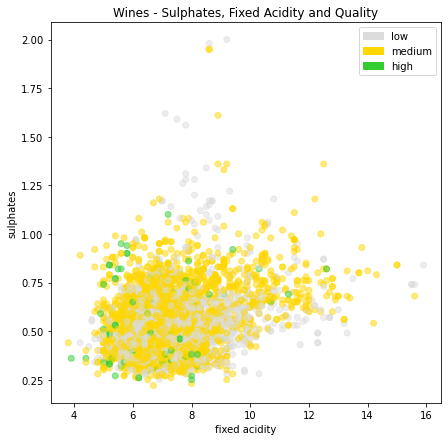

In [ ]:
colors = {"low": "Gainsboro", "medium": "Gold", "high": "LimeGreen"} 

fig, ax = plt.subplots(figsize = (7,7))
scatter = ax.scatter(wines["fixed_acidity"], wines["sulphates"],
           c=wines['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("fixed acidity", fontsize=10)
ax.set_ylabel("sulphates", fontsize=10)
ax.set_title('Wines - Sulphates, Fixed Acidity and Quality')

low_quality = mpatches.Patch(color='Gainsboro', label='low')
medium_quality = mpatches.Patch(color='Gold', label='medium')
high_quality = mpatches.Patch(color='LimeGreen', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

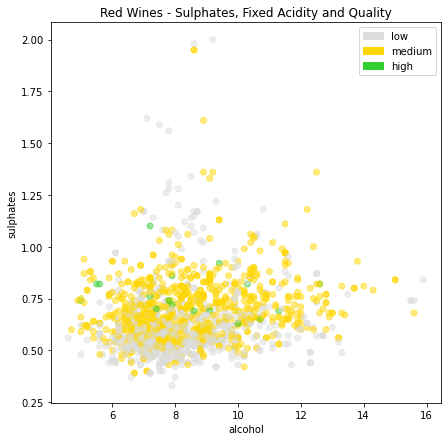

In [ ]:
colors = {"low": "Gainsboro", "medium": "Gold", "high": "LimeGreen"} 

fig, ax = plt.subplots(figsize = (7,7))
scatter = ax.scatter(red_wine["fixed_acidity"], red_wine["sulphates"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("alcohol", fontsize=10)
ax.set_ylabel("sulphates", fontsize=10)
ax.set_title('Red Wines - Sulphates, Fixed Acidity and Quality')

low_quality = mpatches.Patch(color='Gainsboro', label='low')
medium_quality = mpatches.Patch(color='Gold', label='medium')
high_quality = mpatches.Patch(color='LimeGreen', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

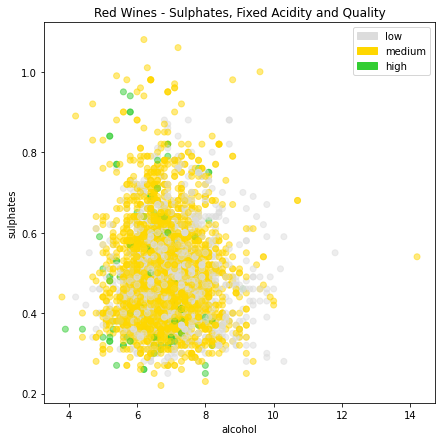

In [ ]:
colors = {"low": "Gainsboro", "medium": "Gold", "high": "LimeGreen"} 

fig, ax = plt.subplots(figsize = (7,7))
scatter = ax.scatter(white_wine["fixed_acidity"], white_wine["sulphates"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("alcohol", fontsize=10)
ax.set_ylabel("sulphates", fontsize=10)
ax.set_title('Red Wines - Sulphates, Fixed Acidity and Quality')

low_quality = mpatches.Patch(color='Gainsboro', label='low')
medium_quality = mpatches.Patch(color='Gold', label='medium')
high_quality = mpatches.Patch(color='LimeGreen', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

In [ ]:
# Calculate skewness and kurtosis:

#Identifying Outliers with Interquartile Range (IQR)
# For the combined wines dataset

Q1 = wines.quantile(0.25)
Q3 = wines.quantile(0.75)
IQR = (Q3 - Q1).round(2)
#For the combined white wines dataset

Q1_w = white_wine.quantile(0.25)
Q3_w = white_wine.quantile(0.75)
IQR_w = (Q3_w - Q1_w).round(2)

#For the combined white wines dataset

Q1_r = red_wine.quantile(0.25)
Q3_r = red_wine.quantile(0.75)
IQR_r = (Q3_r - Q1_r).round(2)


print ("interquartile range for each of the variables in the datasets")
pd.concat((IQR, IQR_w, IQR_r),axis=1, keys= ["IQR all wines", "IQR white wines", "IQR red wines"])

interquartile range for each of the variables in the datasets


,IQR all wines,IQR white wines,IQR red wines
fixed_acidity,1.30,1.00,2.10
volatile_acidity,0.17,0.11,0.25
citric_acid,0.14,0.12,0.33
residual_sugar,6.30,8.20,0.70
chlorides,0.03,0.01,0.02
free_sulfur_dioxide,24.00,23.00,14.00
total_sulfur_dioxide,79.00,59.00,40.00
density,0.00,0.00,0.00
pH,0.21,0.19,0.19
sulphates,0.17,0.14,0.18


In [ ]:
#The code below generates an output with the 'True' and 'False' values. Points where the values are 'True' represent the presence of the outlier.
# For white wines
Outlier_ww = (white_wine.iloc[:,:12] < (Q1_w - 1.5 * IQR_w)) | (white_wine.iloc[:,:12] > (Q3_w + 1.5 * IQR_w))

# Now we count how many outliers we have for each feature
for col in Outlier_ww.columns:
   display(Outlier_ww[col].value_counts().to_frame())

,fixed_acidity
False,4779
True,119


,volatile_acidity
False,4712
True,186


,citric_acid
False,4628
True,270


,residual_sugar
False,4891
True,7


,chlorides
False,4569
True,329


,free_sulfur_dioxide
False,4848
True,50


,total_sulfur_dioxide
False,4879
True,19


,density
False,2452
True,2446


,pH
False,4823
True,75


,sulphates
False,4774
True,124


,alcohol
False,4898


,quality
False,4698
True,200


In [ ]:
#The code below generates an output with the 'True' and 'False' values. Points where the values are 'True' represent the presence of the outlier.
# For red wines

Outlier_rw = (red_wine.iloc[:,:12] < (Q1_r - 1.5 * IQR_r)) | (red_wine.iloc[:,:12] > (Q3_r + 1.5 * IQR_r))

# Now we count how many outliers we have for each feature
for col in Outlier_rw:
   display(Outlier_rw[col].value_counts().to_frame())


,fixed_acidity
False,1550
True,49


,volatile_acidity
False,1580
True,19


,citric_acid
False,1598
True,1


,residual_sugar
False,1444
True,155


,chlorides
False,1490
True,109


,free_sulfur_dioxide
False,1569
True,30


,total_sulfur_dioxide
False,1544
True,55


,density
False,806
True,793


,pH
False,1564
True,35


,sulphates
False,1541
True,58


,alcohol
False,1586
True,13


,quality
False,1571
True,28


In [ ]:
# Checking for outliers with skewness
#Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values.
print("Identifying Outliers with Skewness")

print(pd.concat((white_wine.iloc[:,:12].skew(), red_wine.iloc[:,:12].skew()), axis=1, keys= ["White wines", "Red wines"]),"\n")

# For White Wines:
# based on the skewness value, for White wines, the chlorides feature indicates the presence of extreme values on the right.
# whereas, the ff. features are also skewed,albeit not extreme: free SO4, volatile acidity, citric acid

# For Red Wines:
# based on the skewness value, the chlorides, residual sugar and suphates features indicates the presence of extreme values on the right.
# whereas, the ff. features are also skewed,albeit not extreme: free and total SO4


print("White Wines\n", white_wine["chlorides"].describe(), "\n") # checking the statics on the chlorides features for white wines
print("Red Wines\n", red_wine["residual_sugar"].describe()) # checking the statics on the residual sugar features for red wines for extreme values

Identifying Outliers with Skewness
                      White wines  Red wines
fixed_acidity            0.647751   0.982751
volatile_acidity         1.576980   0.671593
citric_acid              1.281920   0.318337
residual_sugar           1.077094   4.540655
chlorides                5.023331   5.680347
free_sulfur_dioxide      1.406745   1.250567
total_sulfur_dioxide     0.390710   1.515531
density                  0.977773   0.071288
pH                       0.457783   0.193683
sulphates                0.977194   2.428672
alcohol                  0.487342   0.860829
quality                  0.155796   0.217802 

White Wines
 count    4898.000000
mean        0.045772
std         0.021848
min         0.009000
25%         0.036000
50%         0.043000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64 

Red Wines
 count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max  

In [ ]:
# Checking for outliers with kurtosis
print("Identifying Outliers with Kurtosis")

print(pd.concat((white_wine.iloc[:,:12].kurt(), red_wine.iloc[:,:12].kurt()), axis=1, keys= ["White wines", "Red wines"]),"\n")

# Kurtosis is used to find the vertical pull or the peak's height
# Expected Kurtosis is 3 - the greater, the higher the peak
# High outlier frequency for in White Wines:Chlorides and free SO4, density, citric acid
# High outlier frequency for in Red Wines: Residual Sugar, chlorides, total SO4, and sulphates


Identifying Outliers with Kurtosis
                      White wines  Red wines
fixed_acidity            2.172178   1.132143
volatile_acidity         5.091626   1.225542
citric_acid              6.174901  -0.788998
residual_sugar           3.469820  28.617595
chlorides               37.564600  41.715787
free_sulfur_dioxide     11.466342   2.023562
total_sulfur_dioxide     0.571853   3.809824
density                  9.793807   0.934079
pH                       0.530775   0.806943
sulphates                1.590930  11.720251
alcohol                 -0.698425   0.200029
quality                  0.216526   0.296708 



In [ ]:
# here we create a test sample out of the data set we have to analyse. So we can try our model and approach on a smaller, easily verifiable sample.

wines_test = wines.head(20).drop(["quality", "quality_label"], axis=1)

wines_test


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_type
0,7.0,0.170,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.20,white
1,7.7,0.640,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.90,red
2,6.8,0.390,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.00,white
3,6.3,0.280,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.50,white
4,7.4,0.350,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.90,white
5,7.2,0.530,0.14,2.1,0.064,15.0,29.0,0.99323,3.35,0.61,12.10,red
6,7.5,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.20,white
7,6.8,0.110,0.27,8.6,0.044,45.0,104.0,0.99454,3.20,0.37,9.90,white
8,9.0,0.440,0.49,2.4,0.078,26.0,121.0,0.99780,3.23,0.58,9.20,red
9,7.1,0.230,0.30,2.6,0.034,62.0,148.0,0.99121,3.03,0.56,11.30,white


Ecoded Red Wine category: [0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
Ecoded White Wine category: [1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.]
Accuracy: 83.33
--------------------------------------------------------
Confusion Matrix:


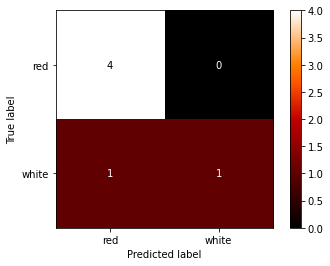

In [ ]:
# Encoding categorical labels or variables

# The function takes a tuple containing the transformer (one hot encoder) we want to apply and the column to which to apply to. Passthrough leaves all other columns untouched.
transformer = make_column_transformer((OneHotEncoder(),["wine_type"]), remainder= "passthrough")

# here we apply the fit transform method to our Dataframe 
transformed = transformer.fit_transform(wines_test)

# Finally, we reconstruct the dataframe
transformed_df = pd.DataFrame(transformed, columns= transformer.get_feature_names_out())

# We split our data into input and output columns X being input and Y being the output or what we want to predict
X = transformed[:,2:]
Y_red = transformed[:,0]
Y_white = transformed[:,1] # this is the second produced column of Y. The opposite of Y1 We create it to test the prediction. Just a thought that it should work.

print("Ecoded Red Wine category:", Y_red)
print("Ecoded White Wine category:", Y_white)

# split the dataset into train and test sets
X_train, X_test, Y_red_train, Y_red_test = train_test_split(X,Y_red, test_size= 0.30, random_state= 1, shuffle= True)

# We perform feature Scaling

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing data
X_test = norm.transform(X_test)

#define the model
model1 = LogisticRegression(max_iter= 200)

#fitting model on training set
model1.fit(X_train, Y_red_train)

#predicting on the training set
Y_predict = model1.predict(X_test)

#evaluate the model's prediction
accuracy = accuracy_score(Y_predict, Y_red_test)

print('Accuracy: %.2f' % (accuracy*100))

print("--------------------------------------------------------")
# Now we want to visualize the Confusion Matrixprint("Confusion Matrix after using Startified KFOLD:")
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(Y_red_test, Y_predict, display_labels= ["red", "white"] ,colorbar= True, cmap="gist_heat")

# the model works and correctly produces two columns. we choose to go with a different encoder below as we only want to work with one column for simplification purposes.

--------------------------------------------------------
checking the encoded table
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality quality_label wine_type  Encoded
0            7.0              0.17         0.74            12.8      0.045                 24.0                 126.0  0.99420  3.26       0.38     12.2        8          high     white        1
1            7.7              0.64         0.21             2.2      0.077                 32.0                 133.0  0.99560  3.27       0.45      9.9        5           low       red        0
2            6.8              0.39         0.34             7.4      0.020                 38.0                 133.0  0.99212  3.18       0.44     12.0        7        medium     white        1
3            6.3              0.28         0.47            11.2      0.040                 61.0                 183.0  0.99592  3.12    

,red,white
red,473,18
white,9,1450


--------------------------------------------------------
The Classificaion Report for our model:
              precision    recall  f1-score   support

         red       0.98      0.96      0.97       491
       white       0.99      0.99      0.99      1459

    accuracy                           0.99      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.99      0.99      0.99      1950
 

--------------------------------------------------------
Cohen-Kappa score: 0.9630273604554973 

--------------------------------------------------------
Confusion Matrix:


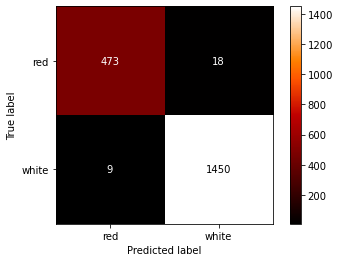

In [ ]:
# After practising on a smaller sample set. We are now ready to to program a model to predict the wine type in or combined wines dataset

# 1st We begin by preparing our data for the Machine Learning Algorithm

# First, we encode categorical labels or variables

# Here we define the Label Binarizer and give it an alias (Better than the onehotencoder above as it only produces one column)
lb = preprocessing.LabelBinarizer()

# First we make a copy of the original dataset
wines_nu = wines.copy()

# now we transform the wine type column variables into binary and add the column to the dataframe
wines_nu["Encoded"] = lb.fit_transform(wines_nu["wine_type"])

#checking the output table
print("--------------------------------------------------------")
print("checking the encoded table")
print(wines_nu.head(5), "\n")

#and now we split the dataset into input and output, whereby X = input and Y = output
X = wines_nu.iloc[:,:-4]
Y = wines_nu.iloc[:,-1]

# here we check our input and output variables
print("--------------------------------------------------------")
print("checking input variables")
print(X.head(5), "\n") 

print("--------------------------------------------------------")
print("checking output variables")
print(Y.head(5), "\n")

# now we split the dataset into train and test samples or sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.3, shuffle= True, random_state=1)

# still preparing our data -  now we perform feature scaling on the X variables using normalisaion function/method
#we fit the scaler on the training data
scaler = MinMaxScaler().fit(X_train)

# then we transform the training data
X_train = scaler.transform(X_train)

# then we transform the testing data
X_test = scaler.transform(X_test)

# 2nd - After preparing the model, we are ready to implement the ML model

#defining the classification model
lr = LogisticRegression(max_iter= 200)

#fitting the model on the training set
lr.fit(X_train, Y_train)

#Now we are ready to predict
lr_predict = lr.predict(X_test)

#evaluate the model's prediction
accuracy = accuracy_score(lr_predict, Y_test)

print("--------------------------------------------------------")
print("Checking the accuracy of the model")
print('The Accuracy is: %.2f' % (accuracy*100), "\n")

# Afterwards, we compute Confusion Matrix to evaluate the accuracy of our classification
print("--------------------------------------------------------")
print("Confusion matrix:")
labels = np.unique(Y_test)
a = confusion_matrix(Y_test, lr_predict, labels=labels)
a = pd.DataFrame(a, index=("red", "white"), columns=("red", "white"))
display(a)

print("--------------------------------------------------------")
print("The Classificaion Report for our model:")
print(classification_report(Y_test, lr_predict, target_names=["red", "white"]),"\n")

print("--------------------------------------------------------")
kappa = cohen_kappa_score(Y_test, lr_predict)
print("Cohen-Kappa score:", kappa, "\n")

print("--------------------------------------------------------")
# Now we want to visualize the Confusion Matrixprint("Confusion Matrix after using Startified KFOLD:")
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(Y_test, lr_predict, display_labels= ["red", "white"] ,colorbar= True, cmap="gist_heat")

plt.show()

--------------------------------------------------------
checking the encoded table
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality quality_label wine_type  Encoded
0            7.0              0.17         0.74            12.8      0.045                 24.0                 126.0  0.99420  3.26       0.38     12.2        8          high     white        1
1            7.7              0.64         0.21             2.2      0.077                 32.0                 133.0  0.99560  3.27       0.45      9.9        5           low       red        0
2            6.8              0.39         0.34             7.4      0.020                 38.0                 133.0  0.99212  3.18       0.44     12.0        7        medium     white        1
3            6.3              0.28         0.47            11.2      0.040                 61.0                 183.0  0.99592  3.12    

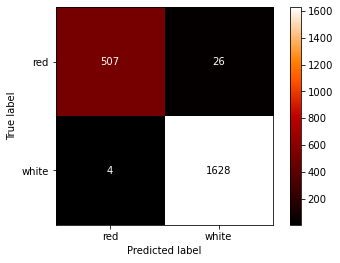

In [ ]:
#Since we have an imbalance dataset, we want to take the ratios into account when sampling and thus try the Stratified Kfold split function below to predic red or white wines

# First we generate our dataset like we did before, encode the categorical target column and specify the inputs and outputs

# We already have an encoded data set. We initialize it in this cell and check a teaser of its content
print("--------------------------------------------------------")
print("checking the encoded table")
print(wines_nu.head(5), "\n")

# And now we split the dataset into input and output, whereby X = input and Y = output
X = wines_nu.iloc[:,:-4]
Y = wines_nu.iloc[:,-1]

# Here we check our input and output variables
print("--------------------------------------------------------")
print("checking input variables")
print(X.head(5), "\n") 

print("--------------------------------------------------------")
print("checking output variables")
print(Y.head(5), "\n")

# Everything is working as expected. So we move on

# Now its time to normalise our input features with normalisation technique
scaler = preprocessing.MinMaxScaler()

# then we fit the scaler on the input features (X variable)
X_scaled = scaler.fit_transform(X)

#defining the classification model
lr = LogisticRegression()

# Now we create a StratifiedKFold object with 3 folds
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
accu_stratified = []

# Now we are ready to use the function to create our folds
for train_index, test_index in skf.split(X, Y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    Y_train_fold, Y_test_fold = Y[train_index], Y[test_index]

    lr.fit(X_train_fold, Y_train_fold)
    accu_stratified.append(lr.score(X_test_fold, Y_test_fold))

    
# Printing the results
print("--------------------------------------------------------")
print("checking the accuracy of our model")

print('List of possible accuracy:', accu_stratified)

print('\nMaximum Accuracy That can be obtained from this model is:',max(accu_stratified)*100, '%')

print('\nMinimum Accuracy:', min(accu_stratified)*100, '%')

print('\nOverall Accuracy:', np.mean(accu_stratified)*100, '%',"\n")

print("--------------------------------------------------------")
print("The Classificaion Report for our model:")
print(classification_report(Y_test_fold, lr.predict(X_test_fold), target_names=["red", "white"]),"\n")

print("--------------------------------------------------------")
kappa = cohen_kappa_score(Y_test_fold, lr.predict(X_test_fold))
print("Cohen-Kappa score:", kappa, "\n")

print("--------------------------------------------------------")
# Now we want to visualize the Confusion Matrix
print("Confusion Matrix after using Startified KFOLD:")
ConfusionMatrixDisplay.from_predictions(Y_test_fold, lr.predict(X_test_fold), display_labels= ["red", "white"] ,colorbar= True, cmap="gist_heat")

plt.show()

#Here is one possible interpretation of Kappa:
# Poor agreement = Less than 0.20 (including negative numbers)
# Fair agreement = 0.20 to 0.40
#Moderate agreement = 0.40 to 0.60
#Good agreement = 0.60 to 0.80
#Very good agreement = 0.80 to 1.00

--------------------------------------------------------
checking the encoded table
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality quality_label wine_type  Encoded
0            7.0              0.17         0.74            12.8      0.045                 24.0                 126.0  0.99420  3.26       0.38     12.2        8          high     white        1
1            7.7              0.64         0.21             2.2      0.077                 32.0                 133.0  0.99560  3.27       0.45      9.9        5           low       red        0
2            6.8              0.39         0.34             7.4      0.020                 38.0                 133.0  0.99212  3.18       0.44     12.0        7        medium     white        1
3            6.3              0.28         0.47            11.2      0.040                 61.0                 183.0  0.99592  3.12    

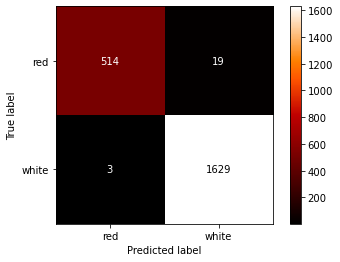

In [ ]:
# In this cell we want to normalize the data in the loop function to prevent data leakage. Otherwise the code is as above. We change the variable intentionally to see whether we truly understand the underlying concept of function and methods below

#Since we have an imbalance dataset, we want to take the ratios into account when sampling and thus try the Stratified Kfold split function below to predic red or white wines

# First we generate our dataset like we did before, encode the categorical target column and specify the inputs and outputs

# We already have an encoded data set. We initialize it in this cell and check a teaser of its content
print("--------------------------------------------------------")
print("checking the encoded table")
print(wines_nu.head(5), "\n")

# And now we split the dataset into input and output, whereby X = input and Y = output
X = wines_nu.iloc[:,:-4]
Y = wines_nu.iloc[:,-1]

# Here we check our input and output variables
print("--------------------------------------------------------")
print("checking input variables")
print(X.head(5), "\n") 

print("--------------------------------------------------------")
print("checking output variables")
print(Y.head(5), "\n")

# Everything is working as expected. So we move on

#defining the classification model
lr = LogisticRegression()

# Now we create a StratifiedKFold object with 3 folds
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

accu_score = []

# Now we are ready to use the function to create our folds
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    #Now its time to normalise our input features with normalisation technique
    scaler = preprocessing.MinMaxScaler().fit(X_train)  #we want to fit the scaler, in this case, minmax, to the training data
    
    #then I apply it to the train & test data       
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test) 

    lr.fit(X_train_scaled, Y_train)
    Y_predict = lr.predict(X_test_scaled)

    accuracy = accuracy_score(Y_predict, Y_test)
    accu_score.append(accuracy)
    
# Printing the results
print("--------------------------------------------------------")
print("checking the accuracy of our model")

print('List of possible accuracy:', accu_score)

print('\nMaximum Accuracy That can be obtained from this model is:',max(accu_score)*100, '%')

print('\nMinimum Accuracy:', min(accu_score)*100, '%')

print('\nOverall Accuracy (mean):', np.mean(accu_score)*100, '%',"\n")

print("--------------------------------------------------------")
print("The Classificaion Report for our model:")
print(classification_report(Y_test, Y_predict, target_names=["red", "white"]),"\n")

print("--------------------------------------------------------")
kappa = cohen_kappa_score(Y_test, Y_predict)
print("Cohen-Kappa score:", kappa, "\n")

print("--------------------------------------------------------")
# Now we want to visualize the Confusion Matrix
print("Confusion Matrix after using Startified KFOLD:")
ConfusionMatrixDisplay.from_predictions(Y_test, Y_predict, display_labels= ["red", "white"] ,colorbar= True, cmap="gist_heat")

plt.show()

In [ ]:
# Now that we have successfully implemented Stratified K Fold and normalizing data, we will try out other binary ML classifiers and output their results in table for better comparison.

# we initialize our dataset in for compfortable working
X = wines_nu.iloc[:,:-4]
Y = wines_nu.iloc[:,-1]

# We initialized each model in the first cell and below we will store it by name in a dictionary
models = {}

#Logistic Regression
models['LR'] = LogisticRegression()

# Support Vector Machines
models['SVM'] = LinearSVC()

#Decision Trees
models['D-Trees'] = DecisionTreeClassifier()

# Random Forest
models['R-Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest'] = KNeighborsClassifier()

#Now we will create another dictionary to store the evaluation metrics
precision, recall, f1, accuracy, cohen = {}, {}, {}, {}, {}

# Now we create a StratifiedKFold object with 3 folds
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)

#now we will loop over the dataset and the different models. First we will concentrate on the redwine dataset
for key in models.keys():
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

    #Now we scale our input features with normalisation technique
        scaler = preprocessing.MinMaxScaler().fit(X_train)  #we want to fit the scaler, in this case, minmax, to the training data
    
    #then I apply it to the train & test data       
        X_train_scaled = scaler.transform(X_train) 
        X_test_scaled = scaler.transform(X_test) 

    #fitting the classifiers on the training data
        models[key].fit(X_train_scaled, Y_train)

    #Let's make predictions  
        predictions = models[key].predict(X_test_scaled)

    #Let's calculate metrics
        precision[key] = round(precision_score(predictions, Y_test),3)
        recall[key] = round(recall_score(predictions, Y_test),3)
        f1[key] = round(f1_score(predictions, Y_test),3)
        accuracy[key] = round(accuracy_score(predictions, Y_test),3)
        cohen[key] = round(cohen_kappa_score(Y_test, predictions),3)
    #Let's create a matrix
        Matrix = ConfusionMatrixDisplay.from_predictions(Y_test, predictions, display_labels= ["red", "white"], colorbar= True, cmap="gist_heat")
        plt.title(models[key])

    
#we create a pandas frame with the stored metrics
Metrics = pd.DataFrame(index= models.keys(), columns=["Precision", "Recall", "f1", "Accuracy"])
Metrics['Precision'] = precision.values()
Metrics['Recall'] = recall.values()
Metrics['f1'] = accuracy.values()
Metrics['Accuracy'] = accuracy.values()
Metrics['Cohen'] = accuracy.values()

display(Metrics)

# lets visualisze or metrics table
ax = Metrics.plot.barh(figsize= (8,6), cmap="plasma")
ax.legend(ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 10})

plt.show()

NameError: name 'wines_nu' is not defined